In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


The success of any company is significantly influenced by how its consumers perceive its products. Every organization endeavors to meet the needs and expectations of its customers, constantly striving for improvement. When a consumer enjoys a product, it signifies success for the company. To comprehend consumer feedback effectively, we must first analyze customer behavior. Therefore, sentiment analysis plays a pivotal role in the analysis of consumer behavior.

The primary purpose of sentiment analysis is to categorize the expressed sentiments, and companies often use it to predict product acceptability and devise strategies to enhance product quality.

**About Dataset:**

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.

**Attribute Information:**

* Review
* Sentiment


**Import necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk


**Load Dataset**

In [3]:
data=pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Data Analysis**

In [4]:
data.dtypes

review       object
sentiment    object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

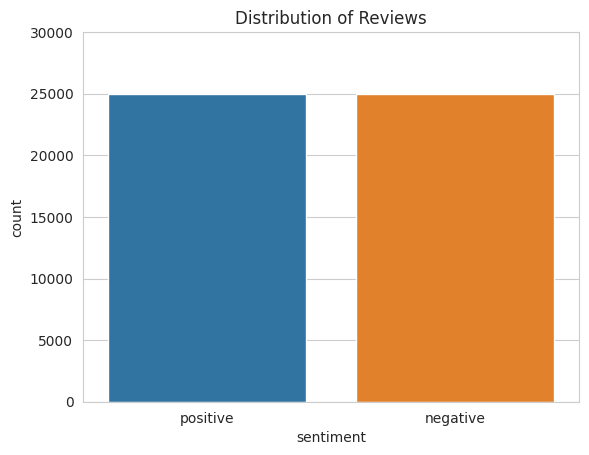

In [8]:

sns.set_style("whitegrid")
sns.countplot(data=data, x='sentiment')
plt.ylim(0, data['sentiment'].value_counts().max() + 5000) 
plt.title("Distribution of Reviews")
plt.show()

**Data Preprocessing**

Mapping sentiment values to numerical values

In [9]:
df={'positive':1,'negative':0}
data['sentiment']=data['sentiment'].map(df)
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


Making sentiments in lower case

In [10]:
data['review']=data['review'].str.lower()
data

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0
49997,i am a catholic taught in parochial elementary...,0
49998,i'm going to have to disagree with the previou...,0


Removing HTML tags

In [11]:
from bs4 import BeautifulSoup

def remove_html_tags(data):
    soup = BeautifulSoup(data, 'html.parser')
    cleaned_data = soup.get_text()
    return cleaned_data
data['cleaned_review'] = data['review'].apply(lambda x: remove_html_tags(x))

data.head()

/tmp/ipykernel_90/328465537.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(data, 'html.parser')


,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,a wonderful little production. <br /><br />the...,1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...,0,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is...",1,"petter mattei's ""love in the time of money"" is..."


Removing URLs

In [12]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: cleaning_URLs(x))
data.head()

,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,a wonderful little production. <br /><br />the...,1,a wonderful little production. the filming tec...
2,i thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...,0,basically there's a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is...",1,"petter mattei's ""love in the time of money"" is..."


Cleaning and removing punctuations

In [13]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: cleaning_punctuations(x))
data.head()

,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,a wonderful little production. <br /><br />the...,1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...,0,basically theres a family where a little boy j...
4,"petter mattei's ""love in the time of money"" is...",1,petter matteis love in the time of money is a ...


Removing Special Characters

In [14]:
def remove_special_characters(data):
    data = re.sub(r'[^\w\s]', ' ', data)
    return data
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: remove_special_characters(x))

data.head()

,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,a wonderful little production. <br /><br />the...,1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...,0,basically theres a family where a little boy j...
4,"petter mattei's ""love in the time of money"" is...",1,petter matteis love in the time of money is a ...


Removing Numbers 

In [15]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: cleaning_numbers(x))
data.head()

,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,a wonderful little production. <br /><br />the...,1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...,0,basically theres a family where a little boy j...
4,"petter mattei's ""love in the time of money"" is...",1,petter matteis love in the time of money is a ...


Removing Repeating characters from review

In [16]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: cleaning_repeating_char(x))
data.head()

,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,a wonderful little production. <br /><br />the...,1,a wonderful little production the filming tech...
2,i thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...,0,basically theres a family where a little boy j...
4,"petter mattei's ""love in the time of money"" is...",1,petter matteis love in the time of money is a ...


Remove stopword

In [17]:
from nltk.corpus import stopwords
STOPWORDS=set(stopwords.words('english'))
def clean_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['cleaned_review']=data['cleaned_review'].apply(lambda x: clean_stopwords(x))
data.head()

,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,one reviewers mentioned watching oz episode yo...
1,a wonderful little production. <br /><br />the...,1,wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,basically there's a family where a little boy ...,0,basically theres family little boy jake thinks...
4,"petter mattei's ""love in the time of money"" is...",1,petter matteis love time money visually stunni...


Getting tokenization of Cleaned Review

In [18]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\s+', gaps = True)
data['cleaned_review'] = data['cleaned_review'].apply(tokenizer.tokenize)
data

,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,"[one, reviewers, mentioned, watching, oz, epis..."
1,a wonderful little production. <br /><br />the...,1,"[wonderful, little, production, filming, techn..."
2,i thought this was a wonderful way to spend ti...,1,"[thought, wonderful, way, spend, time, hot, su..."
3,basically there's a family where a little boy ...,0,"[basically, theres, family, little, boy, jake,..."
4,"petter mattei's ""love in the time of money"" is...",1,"[petter, matteis, love, time, money, visually,..."
...,...,...,...
49995,i thought this movie did a down right good job...,1,"[thought, movie, right, good, job, wasnt, crea..."
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0,"[bad, plot, bad, dialogue, bad, acting, idioti..."
49997,i am a catholic taught in parochial elementary...,0,"[catholic, taught, parochial, elementary, scho..."
49998,i'm going to have to disagree with the previou...,0,"[im, going, disagree, previous, comment, side,..."


Applying Stemming

In [19]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text
data['cleaned_review'] = data['cleaned_review'].apply(lambda x: stemming_on_text(x))
data.head()

,review,sentiment,cleaned_review
0,one of the other reviewers has mentioned that ...,1,"[one, review, mention, watch, oz, episod, youl..."
1,a wonderful little production. <br /><br />the...,1,"[wonder, littl, product, film, techniqu, unass..."
2,i thought this was a wonderful way to spend ti...,1,"[thought, wonder, way, spend, time, hot, summe..."
3,basically there's a family where a little boy ...,0,"[basic, there, famili, littl, boy, jake, think..."
4,"petter mattei's ""love in the time of money"" is...",1,"[petter, mattei, love, time, money, visual, st..."


Plot a cloud of words for negative tweets

(-0.5, 1599.5, 799.5, -0.5)

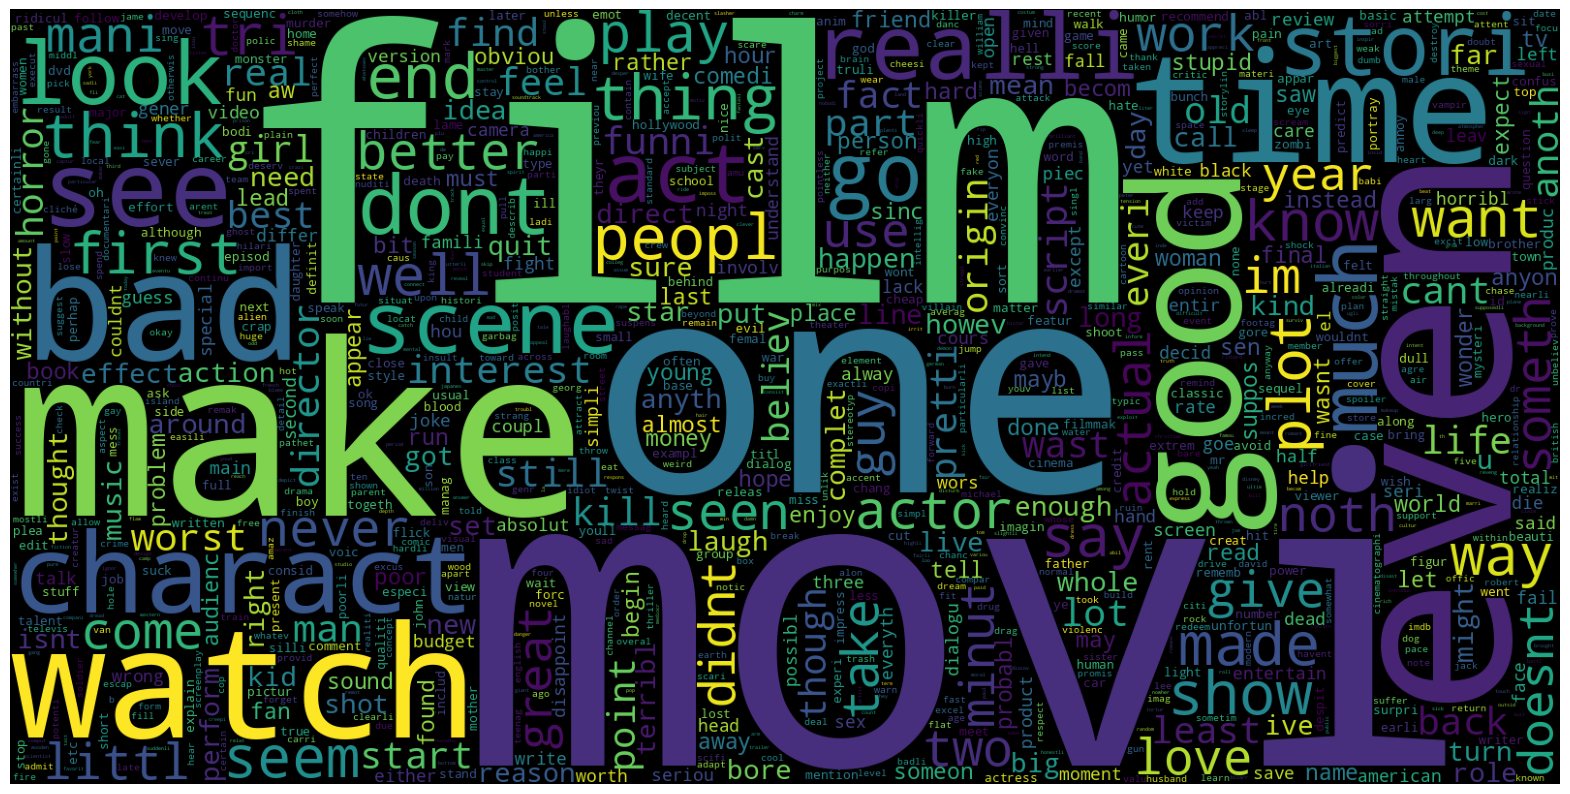

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
data_neg = data[data['sentiment']==0]['cleaned_review'].apply(lambda x: ' '.join(x) )
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')

Plot a cloud of words for positive tweets

(-0.5, 1599.5, 799.5, -0.5)

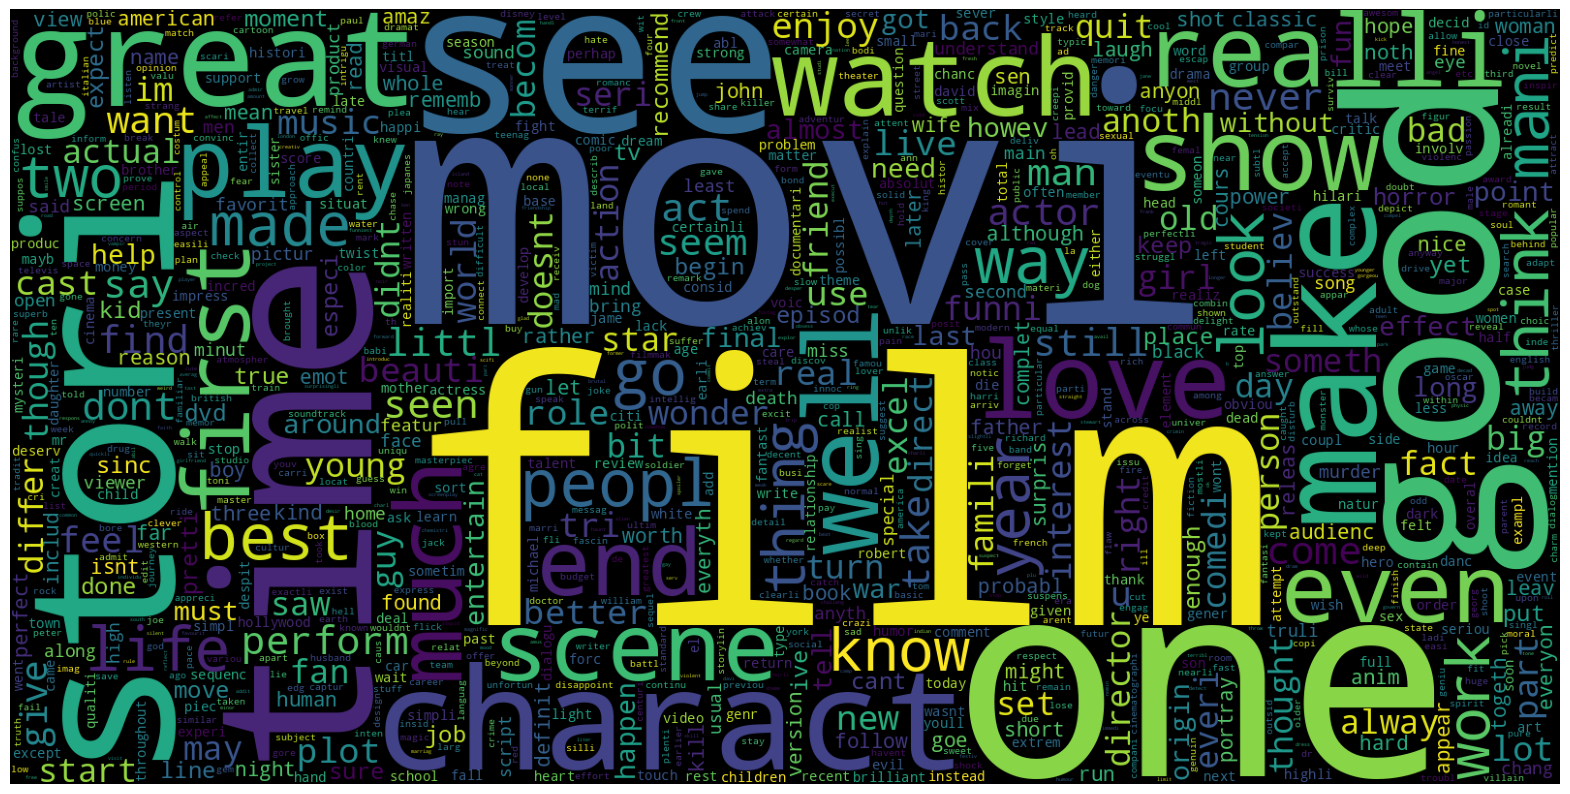

In [21]:
 import matplotlib.pyplot as plt
from wordcloud import WordCloud
data_neg = data[data['sentiment']==1]['cleaned_review'].apply(lambda x: ' '.join(x) )
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')

In [22]:
data['text'] = data['cleaned_review'].apply(lambda x: ' '.join(x) )
data.head()

,review,sentiment,cleaned_review,text
0,one of the other reviewers has mentioned that ...,1,"[one, review, mention, watch, oz, episod, youl...",one review mention watch oz episod youll hook ...
1,a wonderful little production. <br /><br />the...,1,"[wonder, littl, product, film, techniqu, unass...",wonder littl product film techniqu unassum old...
2,i thought this was a wonderful way to spend ti...,1,"[thought, wonder, way, spend, time, hot, summe...",thought wonder way spend time hot summer weeke...
3,basically there's a family where a little boy ...,0,"[basic, there, famili, littl, boy, jake, think...",basic there famili littl boy jake think there ...
4,"petter mattei's ""love in the time of money"" is...",1,"[petter, mattei, love, time, money, visual, st...",petter mattei love time money visual stun film...


Split the data into features (X) and the target variable (y)

In [23]:
X=data.text
y=data.sentiment

Splitting our data into Train and Test Subset

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                    random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(50000,)
(40000,)
(10000,)


Transforming Dataset using TF-IDF Vectorizer

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  5000


In [26]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(40000, 5000)
(10000, 5000)


**Classification Models**

In [27]:
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

SVM Model

In [28]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
test_acc_svm=accuracy_score(y_test,svm_pred)
print(test_acc_svm)

0.8869


Naive Bayes Model

In [29]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_pred = naive_bayes.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
test_acc_nb=accuracy_score(y_test,naive_bayes_pred)
print(test_acc_nb)

0.85


Logistic Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_pred = logistic_reg.predict(X_test)
test_acc_lr = accuracy_score(y_test, logistic_reg_pred)
print(test_acc_lr)

0.8839


**Confusion Matrix of Models**

Text(0.5, 1.0, 'Confusion Matrix SVM')

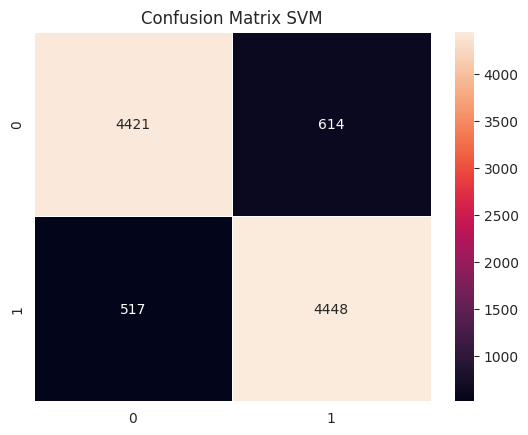

In [31]:
cfm=confusion_matrix(y_test,svm_pred)
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)
plt.title("Confusion Matrix SVM")

Text(0.5, 1.0, 'Confusion Matrix Naive Bayes')

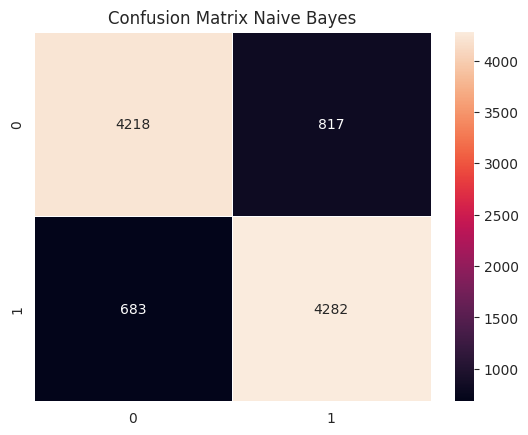

In [32]:
cfm=confusion_matrix(y_test,naive_bayes_pred)
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)
plt.title("Confusion Matrix Naive Bayes")

Text(0.5, 1.0, 'Confusion Matrix Logistic Regression')

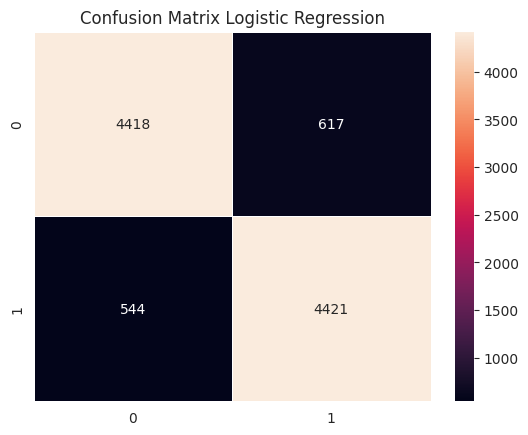

In [33]:
cfm=confusion_matrix(y_test,logistic_reg_pred)
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)
plt.title("Confusion Matrix Logistic Regression")


**Performance Measurement of Models**


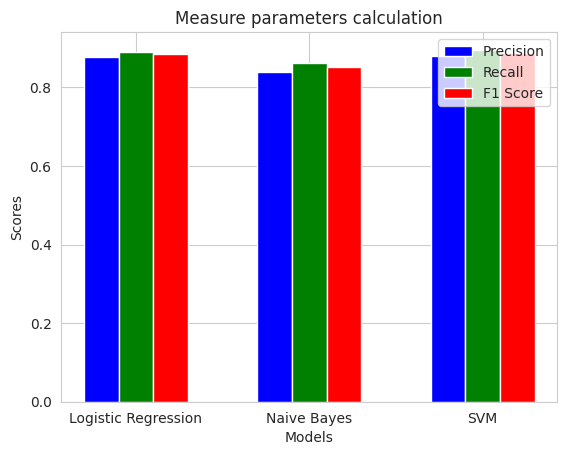

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score


precision_logistic = precision_score(y_test, logistic_reg_pred)
recall_logistic = recall_score(y_test, logistic_reg_pred)
f1_logistic = f1_score(y_test, logistic_reg_pred)

precision_naive_bayes = precision_score(y_test, naive_bayes_pred)
recall_naive_bayes = recall_score(y_test, naive_bayes_pred)
f1_naive_bayes = f1_score(y_test, naive_bayes_pred)

precision_svm = precision_score(y_test, svm_pred)
recall_svm = recall_score(y_test, svm_pred)
f1_svm = f1_score(y_test, svm_pred)


models = ['Logistic Regression', 'Naive Bayes', 'SVM']


precision_scores = [precision_logistic, precision_naive_bayes, precision_svm]
recall_scores = [recall_logistic, recall_naive_bayes, recall_svm]
f1_scores = [f1_logistic, f1_naive_bayes, f1_svm]


bar_width = 0.2


index = np.arange(len(models))


plt.bar(index, precision_scores, bar_width, label='Precision', color='b', align='center')
plt.bar(index + bar_width, recall_scores, bar_width, label='Recall', color='g', align='center')
plt.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1 Score', color='r', align='center')


plt.xlabel('Models')
plt.xticks(index + bar_width, models)


plt.ylabel('Scores')
plt.legend()


plt.title('Measure parameters calculation')
plt.show()
